In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython){
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install git+https://github.com/demetriomagatti/bioinformatics_basics.git@main

  Cloning https://github.com/demetriomagatti/bioinformatics_basics.git (to revision main) to /tmp/pip-req-build-p5v2g6jd
  Running command git clone -q https://github.com/demetriomagatti/bioinformatics_basics.git /tmp/pip-req-build-p5v2g6jd
Note: you may need to restart the kernel to use updated packages.


### Example

In [40]:
from bioinformatics_basics import alignment
solver = alignment.ManhattanSolver(nrows=6,ncols=5,MaxScore=10)

In [41]:
# matrix containing scores for "to nord" movements
solver.MoveNord

array([[9., 1., 3., 5., 2.],
       [7., 0., 0., 6., 5.],
       [4., 3., 8., 2., 9.],
       [5., 7., 6., 9., 4.],
       [2., 3., 6., 7., 0.]])

In [42]:
# matrix containing scores for "to east" movements
solver.MoveEast

array([[5., 0., 1., 1.],
       [0., 1., 3., 1.],
       [9., 8., 7., 5.],
       [0., 6., 0., 5.],
       [3., 0., 7., 0.],
       [6., 8., 8., 5.]])

In [43]:
# matrix containing maximum score to a vertex - empty before running
solver.Score

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [44]:
# moves to maximize score to a vertex - empty before running
solver.Moves

{}

In [45]:
solver.run()

In [46]:
# matrix containing maximum score to a vertex
solver.Score

array([[ 0.,  5.,  5.,  6.,  7.],
       [ 9.,  9., 10., 13., 14.],
       [16., 25., 33., 40., 45.],
       [20., 28., 41., 42., 54.],
       [25., 35., 47., 54., 58.],
       [27., 38., 53., 61., 66.]])

In [58]:
# moves to maximize score to the final vertex
solver.Moves[list(solver.Moves.keys())[-1]]

['Nord', 'Nord', 'East', 'East', 'Nord', 'Nord', 'Nord', 'East', 'East']

<AxesSubplot:>

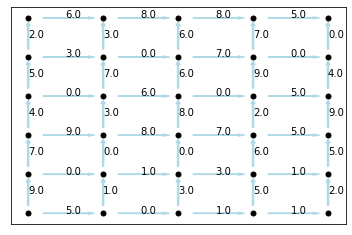

In [59]:
# visual check
solver.visualize()

In [84]:
for key in solver.Moves.keys():
    path = [[0,0]]
    for i in range(len(solver.Moves[key])):
        path.append([solver.Moves[key][:i+1].count('East'),solver.Moves[key][:i+1].count('Nord')])

In [85]:
path

[[0, 0],
 [0, 1],
 [0, 2],
 [1, 2],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [3, 5],
 [4, 5]]

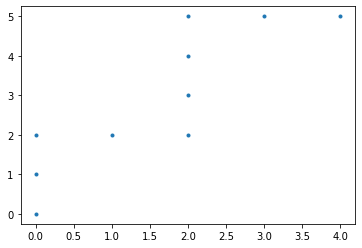

In [93]:
plt.plot(np.transpose(path)[0],np.transpose(path)[1],'.')